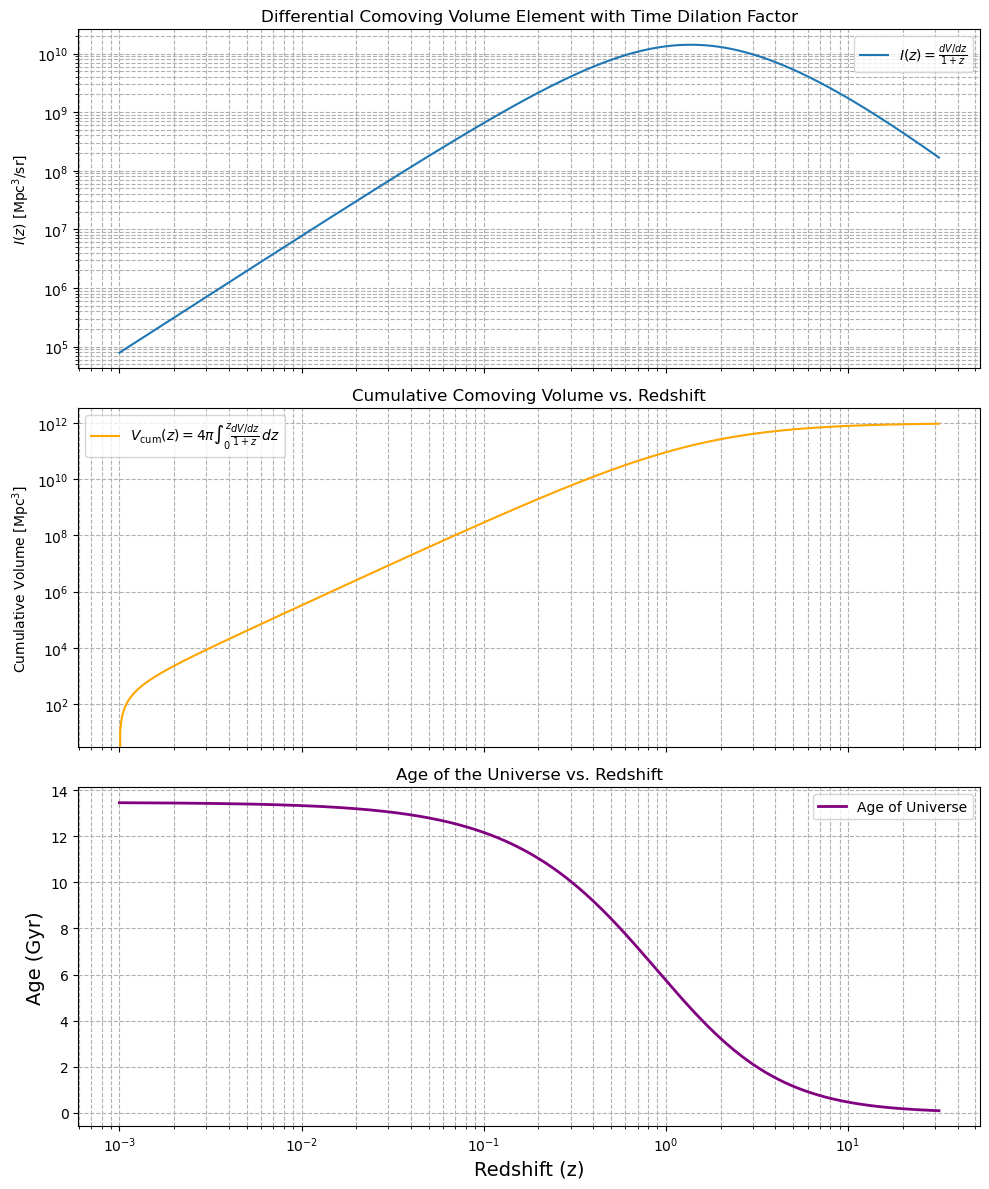

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from scipy.integrate import cumulative_trapezoid

# Define a flat LambdaCDM cosmology
H0 = 70         # Hubble constant in km/s/Mpc
Om0 = 0.3       # Matter density parameter
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Define redshift range (avoid z=0 for log scale)
z = np.logspace(-3, 1.5, 1000)

# Differential comoving volume element per steradian (in Mpc^3/sr)
dVdz_per_sr = cosmo.differential_comoving_volume(z).value  # Mpc^3/sr

# Define the integrand: (dV/dz) / (1+z) to account for time dilation
integrand = dVdz_per_sr / (1 + z)

# Compute the cumulative integral over redshift using cumulative_trapezoid
cumulative_integral = 4 * np.pi * cumulative_trapezoid(integrand, z, initial=0)

# Compute the age of the universe at each redshift (in Gyr)
age = cosmo.age(z).value  # in Gyr

# Create a figure with three vertically stacked subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Panel 1: Plot the differential comoving volume element (with time dilation)
axes[0].plot(z, integrand, label=r'$I(z)=\frac{dV/dz}{1+z}$')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_ylabel(r'$I(z)$ [Mpc$^3$/sr]')
axes[0].set_title('Differential Comoving Volume Element with Time Dilation Factor')
axes[0].grid(True, which="both", ls="--")
axes[0].legend()

# Panel 2: Plot the cumulative comoving volume
axes[1].plot(z, cumulative_integral, color='orange', 
             label=r'$V_{\rm cum}(z)=4\pi\int_0^z \frac{dV/dz}{1+z}\,dz$')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_ylabel('Cumulative Volume [Mpc$^3$]')
axes[1].set_title('Cumulative Comoving Volume vs. Redshift')
axes[1].grid(True, which="both", ls="--")
axes[1].legend()

# Panel 3: Plot the age of the universe vs. redshift
axes[2].plot(z, age, color='purple', lw=2, label='Age of Universe')
axes[2].set_xscale('log')
axes[2].set_xlabel('Redshift (z)', fontsize=14)
axes[2].set_ylabel('Age (Gyr)', fontsize=14)
axes[2].set_title('Age of the Universe vs. Redshift')
axes[2].grid(True, which="both", ls="--")
axes[2].legend()

plt.tight_layout()
plt.show()
